Ques: 1. Generate the following signal for 1 sec duration at sampling frequency
of 200 Hz.
x(t) = 9 sin (2πf1t) + 7 sin (2πf2t) + 5 sin (2πf3t) + 3 sin (2πf4t), (1)
where f1 = 5 Hz, f2 = 15 Hz, f3 = 25 Hz and f4 = 50 Hz.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amplitude')

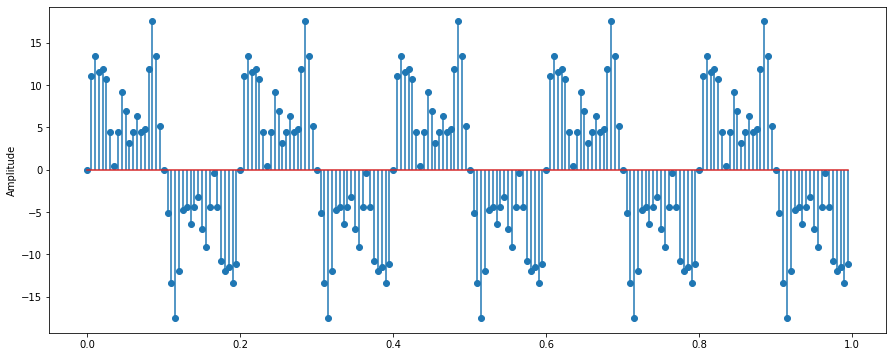

In [14]:
s_freq=200
T=1/s_freq
t=1
N=s_freq*t
f1 = 5
f2 = 15
f3 = 25
f4 = 50
omega1=2*np.pi*f1
omega2=2*np.pi*f2
omega3=2*np.pi*f3
omega4=2*np.pi*f4
t_seq=np.arange(0,1,T)
y=9*np.sin(omega1*t_seq)+7*np.sin(omega2*t_seq)+5*np.sin(omega3*t_seq)+3*np.sin(omega4*t_seq)
fig=plt.figure(1,figsize=(15,6))
plt.stem(t_seq,y)
plt.ylabel('Amplitude')

In [10]:
def DFT(y):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(y)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, y)
    
    return X

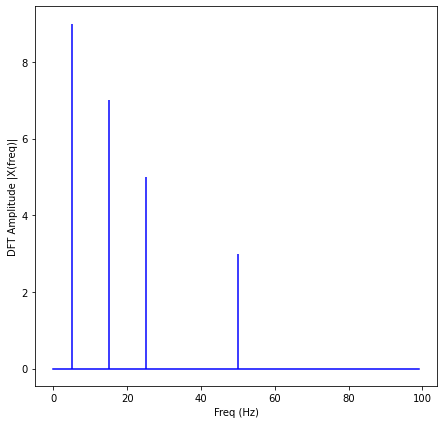

In [12]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

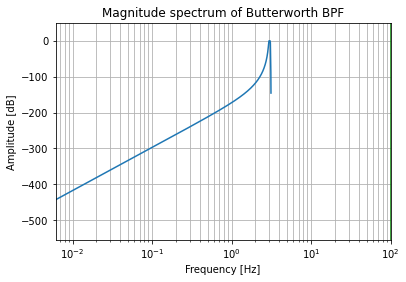

In [18]:
from scipy import signal 
import math
N=6
Wn=[10,30]
fs=0.5

# Conversion in Z-domain 
    
# b is the numerator of the filter & a is
# the denominator 
b, a = signal.butter(N, Wn, 'bandpass', True) 
z, p = signal.bilinear(b, a, fs) 
  
# w is the freq in z-domain & h is the 
# magnitude in z-domain 
w, h = signal.freqz(z, p, 512)

# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Magnitude spectrum of Butterworth BPF')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()

Ques:2

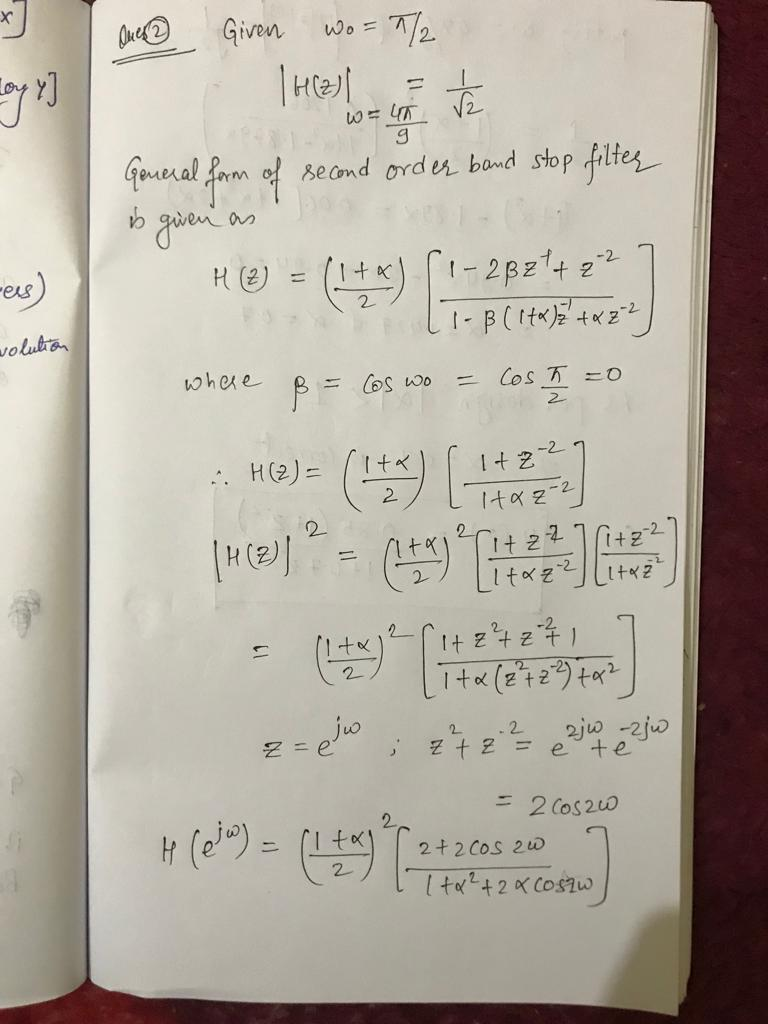

In [1]:
from IPython.display import Image
Image(filename='Image09.jpeg',width=400, height=200)

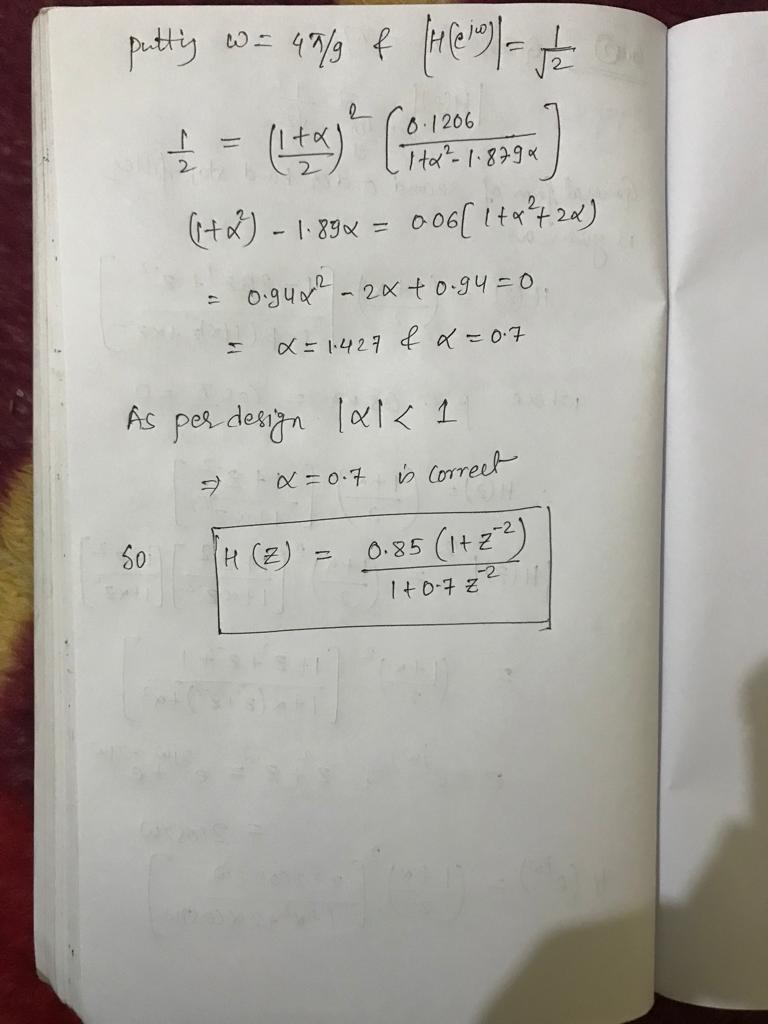

In [2]:
Image(filename='Image10.jpeg',width=400, height=200)

Poles of the transfer functions are [-0.7]
Zeros of the transfer functions are [-1.]


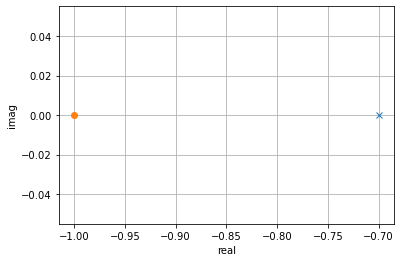

In [4]:
from scipy import signal
N=[0.85,0.85]
D=[1,0.7]
z,p,k=signal.tf2zpk(N,D)
print('Poles of the transfer functions are',p)
print('Zeros of the transfer functions are',z)
x_pole=p.real
y_pole=p.imag
x_zero=z.real
y_zero=z.imag
plt.plot(x_pole,y_pole,'x')
plt.plot(x_zero,y_zero,'o')
plt.xlabel('real')
plt.ylabel('imag')
plt.grid()
plt.show()

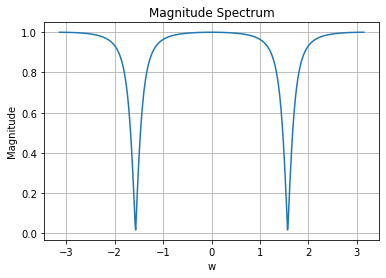

In [5]:
def H(w):
    return(0.85+0.85*np.exp(-1j*2*w))/(1+0.7*np.exp(-1j*2*w))
w=np.linspace(-np.pi,np.pi,512)
mag=[abs(H(i)) for i in w]
plt.plot(w,mag)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid()
plt.show()

Ques:3

In [41]:
from scipy import signal
N=[-0.2,0.18,0.4,1]
D=[1,0.4,0.18,-0.2]
z,p,k=signal.tf2zpk(N,D)
print('Poles of the transfer functions are',p)
print('Zeros of the transfer functions are',z)

Poles of the transfer functions are [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]
Zeros of the transfer functions are [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]


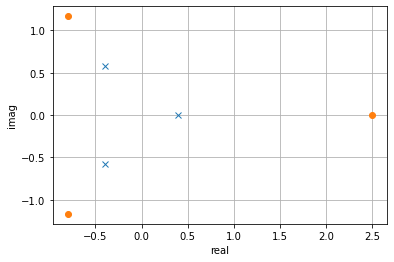

In [42]:
x_pole=p.real
y_pole=p.imag
x_zero=z.real
y_zero=z.imag
plt.plot(x_pole,y_pole,'x')
plt.plot(x_zero,y_zero,'o')
plt.xlabel('real')
plt.ylabel('imag')
plt.grid()
plt.show()


From above we can comment relationship between poles and zeros as both are reciprocal conjugate of each other

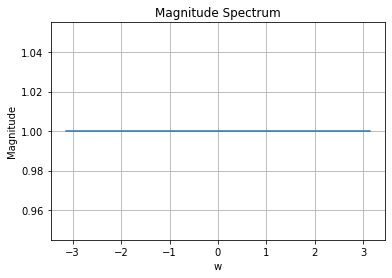

In [45]:

def H(w):
    return(-0.2+0.18*np.exp(-1j*w)+0.4*np.exp(-1j*2*w)+1*np.exp(-1j*3*w))/(1+0.4*np.exp(-1j*w)+0.18*np.exp(-1j*2*w)-0.2*np.exp(-1j*3*w))
w=np.linspace(-np.pi,np.pi,512)
mag=[abs(H(i)) for i in w]
plt.plot(w,mag)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid()
plt.show()

 From above we can conclude that the above filter is all pass filter as the magnitude is constant 

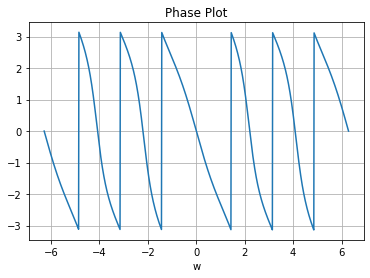

In [23]:
# Phase Response
w=np.linspace(-2*np.pi,2*np.pi,1000)
z=np.exp(1j*w)
N=(-0.2*(z**3))+(0.18*(z**2))+(0.4*z)+1
D=(z**3)+(0.4*(z**2))+(0.18*z)-0.2
tf=N/D
plt.plot(w,np.angle(H))
plt.title('Phase Plot')
plt.xlabel("w")
plt.grid()

Ques:4

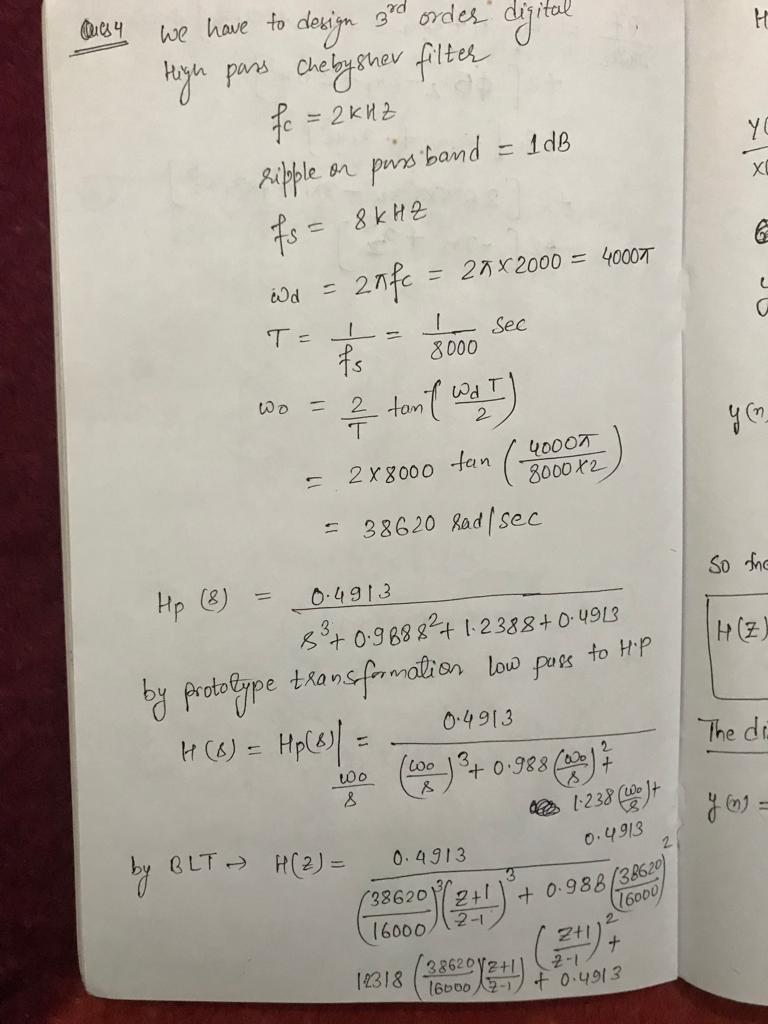

In [47]:
from IPython.display import Image
Image(filename='Image07.jpeg',width=400, height=200)


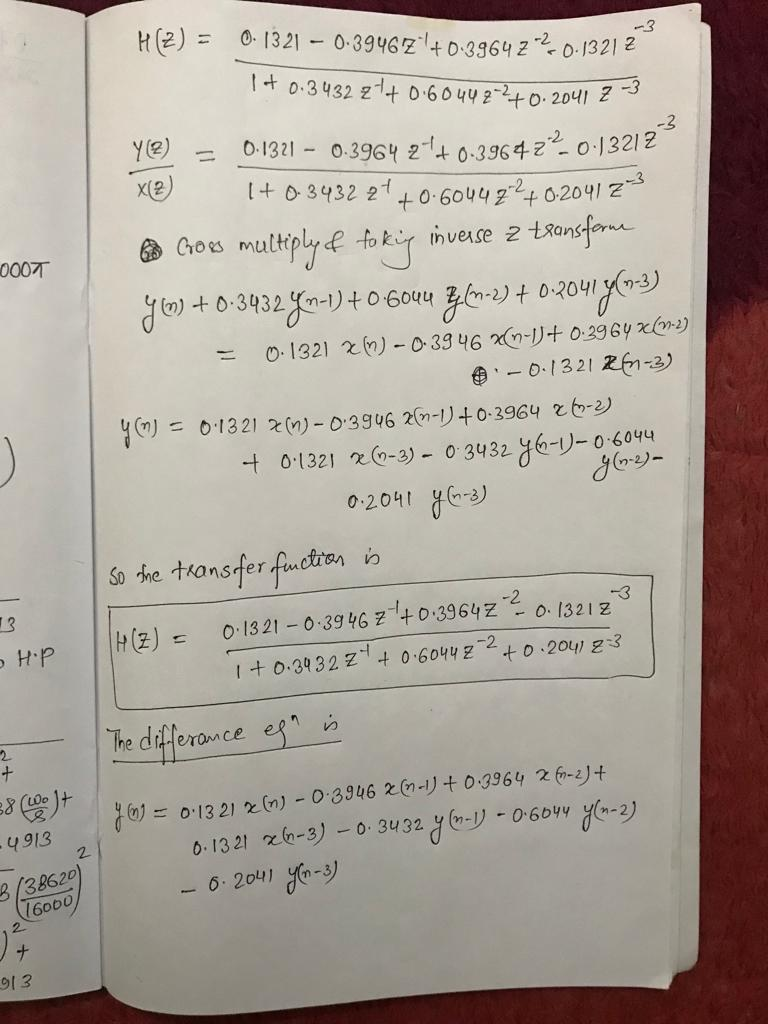

In [48]:
Image(filename='Image08.jpeg',width=400, height=200)

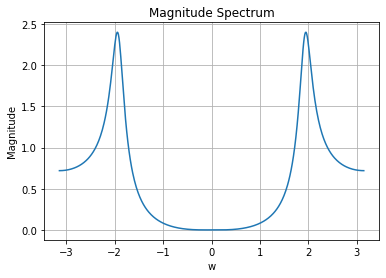

In [49]:
def H(w):
    return(0.1321-0.3946*np.exp(-1j*w)+0.3964*np.exp(-1j*2*w)-0.1321*np.exp(-1j*3*w))/(1+0.3432*np.exp(-1j*w)+0.6044*np.exp(-1j*2*w)-0.2041*np.exp(-1j*3*w))
w=np.linspace(-np.pi,np.pi,512)
mag=[abs(H(i)) for i in w]
plt.plot(w,mag)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid()
plt.show()

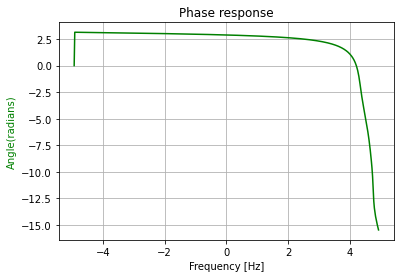

In [50]:
# Phase Response
fig, ax1 = plt.subplots()
  
ax1.set_title('Phase response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
  
angles = np.unwrap(np.angle(h))
  
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()

In [51]:
from scipy import signal
N=[0.1321,-0.3946,0.3964,-0.1321]
D=[1,0.3432,0.6044,0.2041]
z,p,k=signal.tf2zpk(N,D)
print('Poles of the transfer functions are',p)
print('Zeros of the transfer functions are',z)

Poles of the transfer functions are [-0.00231568+0.77641909j -0.00231568-0.77641909j -0.33856864+0.j        ]
Zeros of the transfer functions are [1.09647231+0.23853472j 1.09647231-0.23853472j 0.79418634+0.j        ]


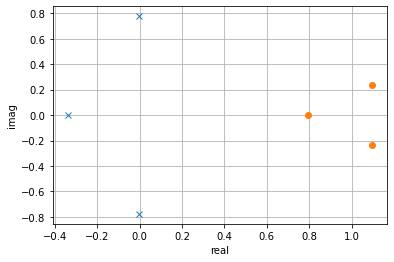

In [52]:
x_pole=p.real
y_pole=p.imag
x_zero=z.real
y_zero=z.imag
plt.plot(x_pole,y_pole,'x')
plt.plot(x_zero,y_zero,'o')
plt.xlabel('real')
plt.ylabel('imag')
plt.grid()
plt.show()

Ques:5

In [53]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
# Specifications of Filter
  
 # sampling frequency
f_sample = 8000 
  
# pass band frequency
f_pass = 1500  
  
# stop band frequency
f_stop = 3000  
  
# pass band ripple
fs = 3
  
# pass band freq in radian
wp = f_pass/(f_sample/2)  
  
# stop band freq in radian
ws = f_stop/(f_sample/2) 
  
# Sampling Time
Td = 1  
  
 # pass band ripple
g_pass = 3
  
# stop band attenuation
g_stop = 10 

Order of the Filter= 2
Cut-off frequency= 0.380 rad/s 


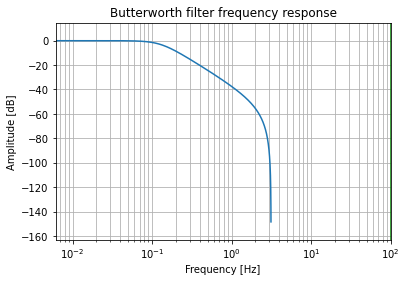

In [54]:
# Conversion to prewrapped analog frequency
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)
  
  
# Design of Filter using signal.buttord function
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True)
  
  
# Printing the values of order & cut-off frequency
print("Order of the Filter=", N)  # N is the order
# Wn is the cut-off freq of the filter
print("Cut-off frequency= {:.3f} rad/s ".format(Wn))

  
# b is the numerator of the filter & a is the denominator
b, a = signal.butter(N, Wn, 'low', True)
z, p = signal.bilinear(b, a, fs)
# w is the freq in z-domain & h is the magnitude in z-domain
w, h = signal.freqz(z, p, 512)


# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()

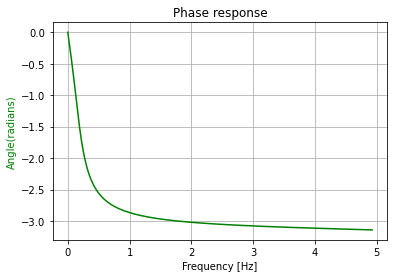

In [55]:
# Phase Response
fig, ax1 = plt.subplots()
  
ax1.set_title('Phase response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')
  
angles = np.unwrap(np.angle(h))
  
ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()

Ques : 6

In [56]:
plt.style.use('seaborn-poster')
%matplotlib inline

Ques: 7

[(1+0j), (1+0j), (3+0j), (1+0j), (-1+0j), (2+0j), 0j, 0j]
[(7+0j), (0.5857864376269046-3.000000000000001j), (-3-2.0000000000000004j), (3.4142135623730954+3.000000000000001j), (-1+0j), (3.4142135623730954-3.000000000000001j), (-3+2.0000000000000004j), (0.5857864376269046+3.000000000000001j)]


C:\Users\Narendra Chaudhary\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


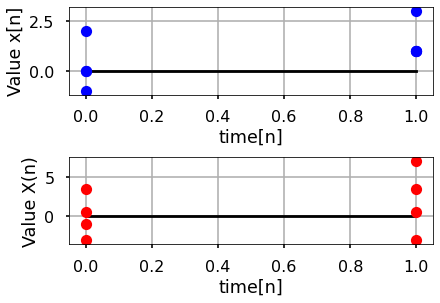

In [57]:
import cmath
import matplotlib.pyplot as plt

sin = cmath.sin
cos = cmath.cos
pi = cmath.pi
exp = cmath.exp

disc = [1, 1, 1, 1, 0, 0, 0, 0]

# __________________________________________________
# Input Values
# __________________________________________________

x0 = [complex(1, 0),
      complex(1, 0),
      complex(3, 0),
      complex(1, 0),
      complex(-1, 0),
      complex(2, 0),
      complex(0, 0),
      complex(0, 0)]
# __________________________________________________
# Default Zero Initialization
# __________________________________________________

x = [complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0)]

x1 = x.copy()
x2 = x.copy()
x3 = x.copy()
# __________________________________________________
#  Finding out the twiddle Factor
# __________________________________________________

w = exp(-complex(0, 1) * 2 * pi / 8)
w0 = w ** 0
w1 = w
w2 = w * w
w3 = w1 * w2

# __________________________________________________
#  Stage 1
# __________________________________________________

x1[0] = x0[0] + x0[4]
x1[1] = x0[0] - x0[4]

x1[2] = x0[2] + x0[6]
x1[3] = x0[2] - x0[6]

x1[4] = x0[1] + x0[5]
x1[5] = x0[1] - x0[5]

x1[6] = x0[3] + x0[7]
x1[7] = x0[3] - x0[7]

# __________________________________________________
#  Stage 2
# __________________________________________________

x2[0] = x1[0] + w0 * x1[2]
x2[1] = x1[1] + w2 * x1[3]
x2[2] = x1[0] - w0 * x1[2]
x2[3] = x1[1] - w2 * x1[3]

x2[4] = x1[4] + w0 * x1[6]
x2[5] = x1[5] + w2 * x1[7]
x2[6] = x1[4] - w0 * x1[6]
x2[7] = x1[5] - w2 * x1[7]

# __________________________________________________
#  Stage 3
# __________________________________________________
x3[0] = x2[0] + w0 * x2[4]
x3[1] = x2[1] + w1 * x2[5]
x3[2] = x2[2] + w2 * x2[6]
x3[3] = x2[3] + w3 * x2[7]
x3[4] = x2[0] - w0 * x2[4]
x3[5] = x2[1] - w1 * x2[5]
x3[6] = x2[2] - w2 * x2[6]
x3[7] = x2[3] - w3 * x2[7]

# __________________________________________________
#  Printing out the result
# __________________________________________________
print(x0)
print(x3)

plt.subplot(2, 1, 1)
plt.plot(disc, [0, 0, 0, 0, 0, 0, 0, 0], color='black')  # Just for Reference
plt.plot(disc, x0, 'bo')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value x[n]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(disc, [0, 0, 0, 0, 0, 0, 0, 0], color='black')  # Just for Reference
plt.plot(disc, x3, 'ro')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value X(n)')
plt.grid()
plt.show()